<a href="https://colab.research.google.com/github/temesgen5335/Logistic-optimization/blob/master/data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The Data for this exploration


There are two datasets available for this project.The first one is the table that contains information about the completed orders
 ####  Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   Trip ID                  536020 non-null  int64
 1   Trip Origin            536020 non-null  address
 2   Trip Destination  536020 non-null  address
 3   Trip Start Time    534369 non-null  timestamp
 4   Trip End Time     536019 non-null  timestamp


 The second one is the table that contains delivery requests by clients
 (completed and unfulfilled)
 ####  Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   id                     1557740 non-null  int64  
 1   order_id          1557740 non-null  int64  
 2   driver_id         1557740 non-null  int64  
 3   driver_action  1557740 non-null  object
 4   lat                     1557740 non-null  float64
 5   lng                    1557740 non-null  float64
 6   created_at      0 non-null        float64
 7   updated_at     0 non-null        float64


## Prerequisites

In [1]:
!pip install notebook datashader holoviews hvplot fastparquet python-snappy
!pip install panel hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.4/155.4 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.2 MB/s eta 0:00:00


In [7]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/cudf/utils/_ptxcompiler.py:61: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.10/dist-packages/numba/cuda/cudadrv/driver.py", line 295, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))
/usr/local/lib/python3.10/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Function "cuInit" not found
  warnings.warn(str(e))


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
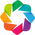

In [4]:
import datashader as ds, pandas as pd, colorcet
import datashader.transfer_functions as tf

import holoviews as hv, pandas as pd, colorcet as cc
from holoviews.element.tiles import EsriImagery
from holoviews.operation.datashader import datashade
hv.extension('bokeh')

## Loading Data

In [6]:
import pandas as pd
import os

#os.chdir("..")
#os.getcwd()

In [6]:
#completed_orders = pd.read_csv('data/nb.csv')
#delivery_requests = pd.read_csv('data/driver_locations_during_request.csv')

In [8]:
delivery_requests_path = '/content/drive/My Drive/week8/driver_locations_during_request.csv'
completed_orders_path = '/content/drive/My Drive/week8/nb.csv'

### driver location during requests

In [13]:
import pandas as pd
delivery_orders_raw = pd.read_csv(delivery_requests_path)

delivery_orders_raw.head(30)



,id,order_id,driver_id,driver_action,lat,lng,created_at,updated_at
0,1,392001,243828,accepted,6.602207,3.270465,NaN,NaN
1,2,392001,243588,rejected,6.592097,3.287445,NaN,NaN
2,3,392001,243830,rejected,6.596133,3.281784,NaN,NaN
3,4,392001,243539,rejected,6.596142,3.280526,NaN,NaN
4,5,392001,171653,rejected,6.609232,3.288800,NaN,NaN
5,6,392001,245662,rejected,6.593095,3.287759,NaN,NaN
6,7,392001,171651,rejected,6.613538,3.270779,NaN,NaN
7,8,392001,243906,rejected,6.591838,3.276124,NaN,NaN
8,9,392001,226949,rejected,6.610941,3.276126,NaN,NaN
9,10,392001,243769,rejected,6.617199,3.271723,NaN,NaN


### Trip data

In [17]:
completed_orders_raw = pd.read_csv(completed_orders_path)

completed_orders_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Trip ID           536020 non-null  int64 
 1   Trip Origin       536020 non-null  object
 2   Trip Destination  536020 non-null  object
 3   Trip Start Time   534369 non-null  object
 4   Trip End Time     536019 non-null  object
dtypes: int64(1), object(4)
memory usage: 20.4+ MB


In [11]:
# droping the unnamed value
if 'Unnamed: 32' in delivery_orders_raw.columns:
  delivery_orders_raw = delivery_orders_raw.drop('Unnamed: 32', axis=1)

if 'Unnamed: 32' in completed_orders_raw.columns:
  completed_orders_raw = completed_orders_raw.drop('Unnamed: 32', axis=1)


#delivery_orders.head()


## Data overview Info

In [23]:
delivery_orders_raw

,id,order_id,driver_id,driver_action,lat,lng,created_at,updated_at
0,1,392001,243828,accepted,6.602207,3.270465,NaN,NaN
1,2,392001,243588,rejected,6.592097,3.287445,NaN,NaN
2,3,392001,243830,rejected,6.596133,3.281784,NaN,NaN
3,4,392001,243539,rejected,6.596142,3.280526,NaN,NaN
4,5,392001,171653,rejected,6.609232,3.288800,NaN,NaN
...,...,...,...,...,...,...,...,...
1557735,1557736,517948,243774,rejected,6.469036,3.566877,NaN,NaN
1557736,1557737,517948,245447,rejected,6.425431,3.527358,NaN,NaN
1557737,1557738,517948,239866,rejected,6.440013,3.525378,NaN,NaN
1557738,1557739,517948,243774,rejected,6.469036,3.566877,NaN,NaN


In [12]:
delivery_orders_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557740 entries, 0 to 1557739
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   id             1557740 non-null  int64  
 1   order_id       1557740 non-null  int64  
 2   driver_id      1557740 non-null  int64  
 3   driver_action  1557740 non-null  object 
 4   lat            1557740 non-null  float64
 5   lng            1557740 non-null  float64
 6   created_at     0 non-null        float64
 7   updated_at     0 non-null        float64
dtypes: float64(4), int64(3), object(1)
memory usage: 95.1+ MB


In [19]:
delivery_orders_raw['order_id']

0          392001
1          392001
2          392001
3          392001
4          392001
            ...  
1557735    517948
1557736    517948
1557737    517948
1557738    517948
1557739    517948
Name: order_id, Length: 1557740, dtype: int64

In [14]:
completed_orders_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Trip ID           536020 non-null  int64 
 1   Trip Origin       536020 non-null  object
 2   Trip Destination  536020 non-null  object
 3   Trip Start Time   534369 non-null  object
 4   Trip End Time     536019 non-null  object
dtypes: int64(1), object(4)
memory usage: 20.4+ MB


In [27]:
# Drop rows where Trip Start Time or Trip End Time are missing
delivery_orders_raw = delivery_orders_raw.dropna(subset=['driver_action'])

#unique_order_ids = delivery_orders_raw['order_id'].drop_duplicates()
#unique_order_ids.info()

<class 'pandas.core.series.Series'>
Index: 0 entries
Series name: order_id
Non-Null Count  Dtype
--------------  -----
0 non-null      int64
dtypes: int64(1)
memory usage: 0.0 bytes


In [21]:
# Filter for rows where driver_action is 'accepted'
accepted_orders = delivery_orders_raw[delivery_orders_raw['driver_action'] == 'accepted']

# Count the number of unique order IDs
num_accepted_orders = accepted_orders['order_id'].nunique()

# Print the number of accepted orders
print("Number of accepted orders:", num_accepted_orders)


Number of accepted orders: 25881


**Data overview**


Completed Orders: Total Entries: 536,020

Delivery Requests  Total Entries: 1,557,740

The number of accepted orders are: 25881


**Basic Statistics**

In [16]:
print (completed_orders_raw.describe())


            Trip ID
count  5.360200e+05
mean   9.910221e+05
std    3.456364e+05
min    3.919960e+05
25%    6.935610e+05
50%    9.910085e+05
75%    1.281570e+06
max    1.637709e+06


## Handling Missing values and Outliers

In [48]:
# Drop rows where Trip Start Time or Trip End Time are missing
completed_orders = completed_orders_raw.dropna(subset=['Trip Start Time', 'Trip End Time'])

# Display the number of rows before and after dropping missing values
null_values = len(completed_orders_raw)- len(completed_orders)

null_values
print ('The number of rows that are missing are:', null_values)

The number of rows that are missing are: 1652


In [50]:
completed_orders


,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28
2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23
3,391999,"6.572757200000001,3.3677082","6.584881099999999,3.3614073",2021-07-01 07:16:07,2021-07-01 07:29:42
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36
...,...,...,...,...,...
536015,1637696,"6.448218499999999,3.4772075","6.437787399999999,3.481670199999999",2021-12-30 20:35:06,2021-12-30 21:02:59
536016,1637702,"6.442320899999999,3.4736868","6.436589333407897,3.5559738188407835",2021-12-30 20:48:13,2021-12-30 21:43:49
536017,1637704,"6.4281982,3.492248","6.448088500000001,3.4775747",2021-12-30 20:51:45,2021-12-30 21:41:32
536018,1637705,"6.5869296,3.3632966","6.637906899999999,3.3339515",2021-12-30 20:48:50,2021-12-30 21:08:28


In [59]:
from datetime import datetime

# Convert Trip Start Time and Trip End Time to datetime
completed_orders['Trip Start Time'] = pd.to_datetime(completed_orders['Trip Start Time'])
completed_orders['Trip End Time'] = pd.to_datetime(completed_orders['Trip End Time'])

completed_orders[['Trip Start Time', 'Trip End Time']]

<ipython-input-59-9313904091d4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_orders['Trip Start Time'] = pd.to_datetime(completed_orders['Trip Start Time'])
<ipython-input-59-9313904091d4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_orders['Trip End Time'] = pd.to_datetime(completed_orders['Trip End Time'])


,Trip Start Time,Trip End Time
0,2021-07-01 07:28:04,2021-07-01 07:29:37
1,2021-07-01 06:38:04,2021-07-01 07:07:28
2,2021-07-01 06:21:02,2021-07-01 07:02:23
3,2021-07-01 07:16:07,2021-07-01 07:29:42
4,2021-07-01 09:30:59,2021-07-01 09:34:36
...,...,...
536015,2021-12-30 20:35:06,2021-12-30 21:02:59
536016,2021-12-30 20:48:13,2021-12-30 21:43:49
536017,2021-12-30 20:51:45,2021-12-30 21:41:32
536018,2021-12-30 20:48:50,2021-12-30 21:08:28


In [60]:
completed_orders[['Trip Start Time', 'Trip End Time']].isna().sum()

Trip Start Time    0
Trip End Time      0
dtype: int64

In [64]:
# Calculate trip duration in minutes
completed_orders.loc[:, 'Trip Duration'] = (completed_orders['Trip End Time'] - completed_orders['Trip Start Time'])

# Convert trip duration to minutes
completed_orders.loc[:, 'Trip Duration'] = completed_orders['Trip Duration'].dt.total_seconds() / 60
completed_orders['Trip Duration']

0          1.550000
1         29.400000
2         41.350000
3         13.583333
4          3.616667
            ...    
536015    27.883333
536016    55.600000
536017    49.783333
536018    19.633333
536019    89.366667
Name: Trip Duration, Length: 534368, dtype: float64

In [65]:
# Create a new dataframe with Trip ID and Trip Duration (seconds)
trip_duration = completed_orders[['Trip ID', 'Trip Duration']].copy()

# Calculate trip duration in seconds
#trip_duration['Trip Duration (seconds)'] = (trip_duration['Trip End Time'] - trip_duration['Trip Start Time']).dt.total_seconds()
#trip_duration['Trip Duration (minutes)'] = trip_duration['Trip Duration (seconds)'] / 60

trip_duration[['Trip ID', 'Trip Duration']]


,Trip ID,Trip Duration
0,391996,1.550000
1,391997,29.400000
2,391998,41.350000
3,391999,13.583333
4,392001,3.616667
...,...,...
536015,1637696,27.883333
536016,1637702,55.600000
536017,1637704,49.783333
536018,1637705,19.633333


In [52]:

completed_orders[['Trip Origin', 'Trip Destination']]

,Trip Origin,Trip Destination
0,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307"
1,"6.4316714,3.4555375","6.4280814653326,3.4721885847586"
2,"6.631679399999999,3.3388976","6.508324099999999,3.3590397"
3,"6.572757200000001,3.3677082","6.584881099999999,3.3614073"
4,"6.6010417,3.2766339","6.4501069,3.3916154"
...,...,...
536015,"6.448218499999999,3.4772075","6.437787399999999,3.481670199999999"
536016,"6.442320899999999,3.4736868","6.436589333407897,3.5559738188407835"
536017,"6.4281982,3.492248","6.448088500000001,3.4775747"
536018,"6.5869296,3.3632966","6.637906899999999,3.3339515"


In [66]:
# Split Trip Origin and Trip Destination into Latitude and Longitude
completed_orders[['Origin Latitude', 'Origin Longitude']] = completed_orders['Trip Origin'].str.split(',', expand=True)
completed_orders[['Destination Latitude', 'Destination Longitude']] = completed_orders['Trip Destination'].str.split(',', expand=True)

completed_orders[['Origin Latitude', 'Origin Longitude']]

<ipython-input-66-1141fb6b3f31>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_orders[['Origin Latitude', 'Origin Longitude']] = completed_orders['Trip Origin'].str.split(',', expand=True)
<ipython-input-66-1141fb6b3f31>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_orders[['Destination Latitude', 'Destination Longitude']] = completed_orders['Trip Destination'].str.split(',', expand=True)


,Origin Latitude,Origin Longitude
0,6.508813001668548,3.37740316890347
1,6.4316714,3.4555375
2,6.631679399999999,3.3388976
3,6.572757200000001,3.3677082
4,6.6010417,3.2766339
...,...,...
536015,6.448218499999999,3.4772075
536016,6.442320899999999,3.4736868
536017,6.4281982,3.492248
536018,6.5869296,3.3632966


In [67]:
completed_orders[['Destination Latitude', 'Destination Longitude']].isna().sum()

Destination Latitude     0
Destination Longitude    0
dtype: int64

In [68]:
# Split Trip Origin and Trip Destination into Latitude and Longitude
completed_orders[['Origin Latitude', 'Origin Longitude']] = completed_orders['Trip Origin'].str.split(',', expand=True)
completed_orders[['Destination Latitude', 'Destination Longitude']] = completed_orders['Trip Destination'].str.split(',', expand=True)

# Add Trip ID column
completed_orders['Trip ID'] = completed_orders['Trip ID']

completed_orders[['Trip ID', 'Origin Latitude', 'Origin Longitude']]


<ipython-input-68-18dbd9295a64>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_orders[['Origin Latitude', 'Origin Longitude']] = completed_orders['Trip Origin'].str.split(',', expand=True)
<ipython-input-68-18dbd9295a64>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_orders[['Destination Latitude', 'Destination Longitude']] = completed_orders['Trip Destination'].str.split(',', expand=True)
<ipython-input-68-18dbd9295a64>:6: SettingWithCopyWarning: 
A value is trying to be set on a co

,Trip ID,Origin Latitude,Origin Longitude
0,391996,6.508813001668548,3.37740316890347
1,391997,6.4316714,3.4555375
2,391998,6.631679399999999,3.3388976
3,391999,6.572757200000001,3.3677082
4,392001,6.6010417,3.2766339
...,...,...,...
536015,1637696,6.448218499999999,3.4772075
536016,1637702,6.442320899999999,3.4736868
536017,1637704,6.4281982,3.492248
536018,1637705,6.5869296,3.3632966


In [69]:
# Convert Latitude and Longitude to float
completed_orders['Origin Latitude'] = completed_orders['Origin Latitude'].astype(float)
completed_orders['Origin Longitude'] = completed_orders['Origin Longitude'].astype(float)
completed_orders['Destination Latitude'] = completed_orders['Destination Latitude'].astype(float)
completed_orders['Destination Longitude'] = completed_orders['Destination Longitude'].astype(float)

#completed_orders['Destination Longitude']
completed_orders[['Trip ID', 'Destination Longitude']]

<ipython-input-69-70ed2f0aa358>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_orders['Origin Latitude'] = completed_orders['Origin Latitude'].astype(float)
<ipython-input-69-70ed2f0aa358>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_orders['Origin Longitude'] = completed_orders['Origin Longitude'].astype(float)
<ipython-input-69-70ed2f0aa358>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,Trip ID,Destination Longitude
0,391996,3.345031
1,391997,3.472189
2,391998,3.359040
3,391999,3.361407
4,392001,3.391615
...,...,...
536015,1637696,3.481670
536016,1637702,3.555974
536017,1637704,3.477575
536018,1637705,3.333951


## Data Visualization

In [70]:
!pip install pandas matplotlib

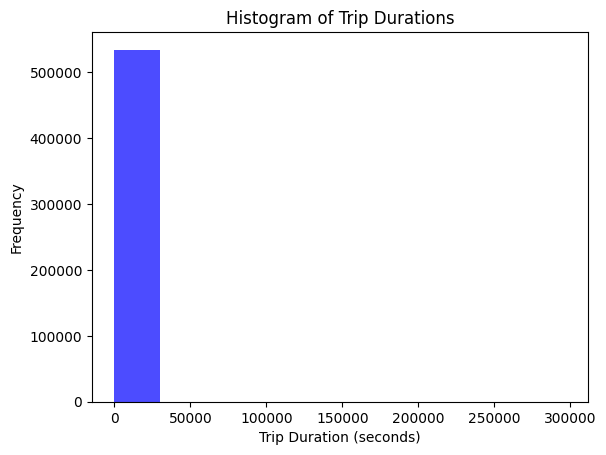

In [71]:
import matplotlib.pyplot as plt

# Histogram of trip durations
#plt.figure(figsize=(10, 6))
plt.hist(completed_orders['Trip Duration'], bins=10, alpha=0.7, color='blue')
plt.title('Histogram of Trip Durations')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Scatter plot of trip origins and destinations
plt.scatter(completed_orders['Origin Longitude'], completed_orders['Origin Latitude'], color='red', label='Origin')
plt.scatter(completed_orders['Destination Longitude'], completed_orders['Destination Latitude'], color='green', label='Destination')
plt.title('Trip Origins and Destinations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()